### Importação dos dados



In [8]:
import pandas as pd
import matplotlib.pyplot as plt


url1 = "https://raw.githubusercontent.com/robertdevelopment/AluraStore/main/loja_1.csv"
url2 = "https://raw.githubusercontent.com/robertdevelopment/AluraStore/main/loja_2.csv"
url3 = "https://raw.githubusercontent.com/robertdevelopment/AluraStore/main/loja_3.csv"
url4 = "https://raw.githubusercontent.com/robertdevelopment/AluraStore/main/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [ ]:
## Loja 1 Faturamento

faturamento_loja1 = loja1['Preço'].sum()
print(f"O faturamento da Loja 1 é: R$ {faturamento_loja1:.2f}")

## Loja 2 Faturamento
faturamento_loja2 = loja2['Preço'].sum()
print(f"O faturamento da Loja 2 é: R$ {faturamento_loja2:.2f}")


## Loja 3 Faturamento

faturamento_loja3 = loja3['Preço'].sum()
print(f"O faturamento da Loja 3 é: R$ {faturamento_loja3:.2f}")


## Loja 4 Faturamento
faturamento_loja4 = loja4['Preço'].sum()
print(f"O faturamento da Loja 4 é: R$ {faturamento_loja4:.2f}")


O faturamento da Loja 1 é: R$ 1534509.12
O faturamento da Loja 2 é: R$ 1488459.06
O faturamento da Loja 3 é: R$ 1464025.03
O faturamento da Loja 4 é: R$ 1384497.58


In [ ]:
faturamento_total = faturamento_loja1 + faturamento_loja2 + faturamento_loja3 + faturamento_loja4
print(f"O faturamento total das 4 lojas é de: R$ {faturamento_total:.2f}")


O faturamento total das 4 lojas é: R$ 5871490.79


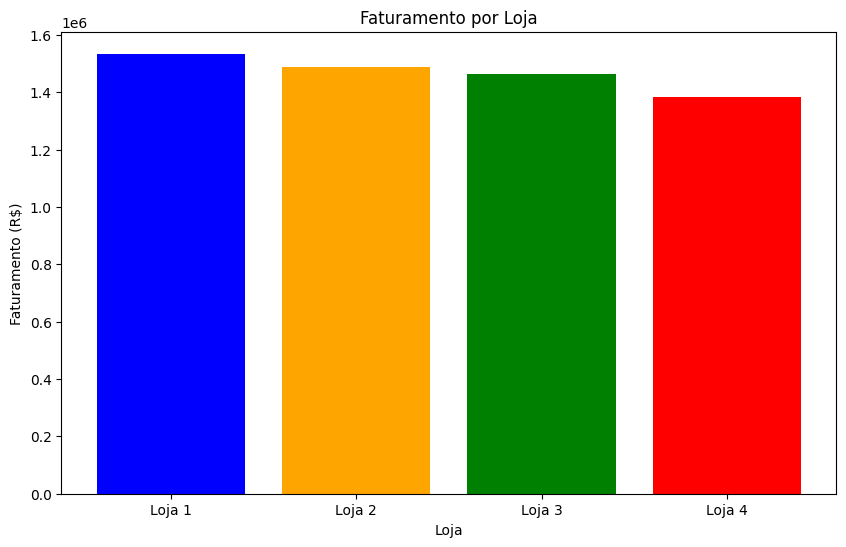

In [ ]:
faturamentos_das_lojas = {
    'Loja 1': faturamento_loja1,
    'Loja 2': faturamento_loja2,
    'Loja 3': faturamento_loja3,
    'Loja 4': faturamento_loja4
}

faturamento_df = pd.DataFrame(list(faturamentos_das_lojas.items()), columns=['Loja', 'Faturamento'])
faturamento_df
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(faturamento_df['Loja'], faturamento_df['Faturamento'], color=['blue', 'orange', 'green', 'red'])
plt.title('Faturamento por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.show()


# 2. Vendas por Categoria

In [ ]:

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [ ]:
vendas_por_categoria = [
    loja1.groupby('Categoria do Produto').size().reset_index(name="Número de Vendas"),
    loja2.groupby('Categoria do Produto').size().reset_index(name="Número de Vendas"),
    loja3.groupby('Categoria do Produto').size().reset_index(name="Número de Vendas"),
    loja4.groupby('Categoria do Produto').size().reset_index(name="Número de Vendas"),
]

vendas_por_categoria[0].columns = ['Categoria do Produto', 'Número de Vendas Loja 1']
vendas_por_categoria[1].columns = ['Categoria do Produto', 'Número de Vendas Loja 2']
vendas_por_categoria[2].columns = ['Categoria do Produto', 'Número de Vendas Loja 3']
vendas_por_categoria[3].columns = ['Categoria do Produto', 'Número de Vendas Loja 4']

vendas_comparativas = vendas_por_categoria[0]
for df in vendas_por_categoria[1:]:
    vendas_comparativas = pd.merge(vendas_comparativas, df, on='Categoria do Produto', how='outer')
vendas_comparativas = vendas_comparativas.fillna(0)
vendas_comparativas


,Categoria do Produto,Número de Vendas Loja 1,Número de Vendas Loja 2,Número de Vendas Loja 3,Número de Vendas Loja 4
0,brinquedos,324,313,315,338
1,eletrodomesticos,312,305,278,254
2,eletronicos,448,422,451,451
3,esporte e lazer,284,275,277,277
4,instrumentos musicais,182,224,177,170
5,livros,173,197,185,187
6,moveis,465,442,499,480
7,utilidades domesticas,171,181,177,201


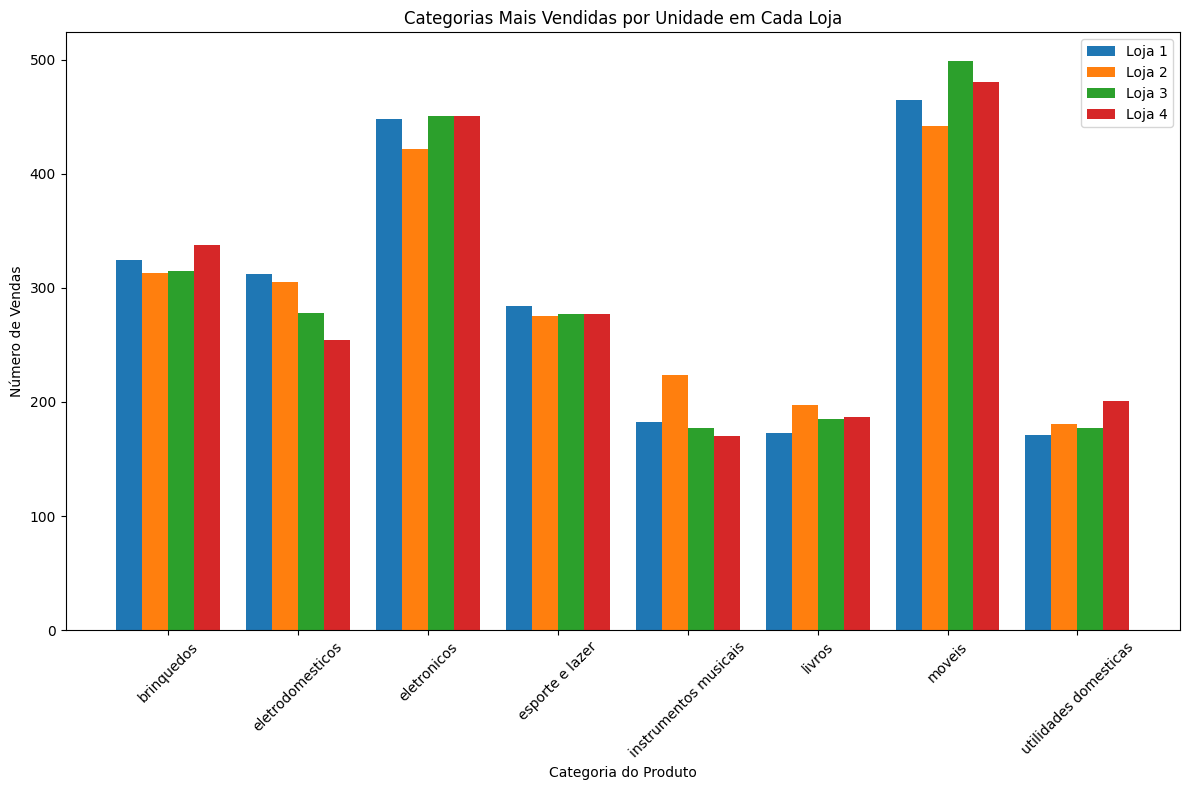

In [ ]:
# Categorias Mais Vendidas por Unidade em Cada Loja

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
bar_width = 0.2
index = range(len(vendas_comparativas))
plt.bar([i - 1.5 * bar_width for i in index], vendas_comparativas['Número de Vendas Loja 1'], width=bar_width, label='Loja 1')
plt.bar([i - 0.5 * bar_width for i in index], vendas_comparativas['Número de Vendas Loja 2'], width=bar_width, label='Loja 2')
plt.bar([i + 0.5 * bar_width for i in index], vendas_comparativas['Número de Vendas Loja 3'], width=bar_width, label='Loja 3')
plt.bar([i + 1.5 * bar_width for i in index], vendas_comparativas['Número de Vendas Loja 4'], width=bar_width, label='Loja 4')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.title('Categorias Mais Vendidas por Unidade em Cada Loja')
plt.xticks(index, vendas_comparativas['Categoria do Produto'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas


In [9]:
media_loja1 = loja1['Avaliação da compra'].mean()
media_loja2 = loja2['Avaliação da compra'].mean()
media_loja3 = loja3['Avaliação da compra'].mean()
media_loja4 = loja4['Avaliação da compra'].mean()


In [10]:
media_loja1 = round(media_loja1, 2)



In [14]:
media_pct_loja1 = loja1['Avaliação da compra'].mean() / 5 * 100
media_pct_loja1 = round(media_pct_loja1, 2)


medias = {
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Média Avaliação": [
        loja1["Avaliação da compra"].mean(),
        loja2["Avaliação da compra"].mean(),
        loja3["Avaliação da compra"].mean(),
        loja4["Avaliação da compra"].mean()
    ]
}

df_medias = pd.DataFrame(medias)
df_medias["Média Avaliação (%)"] = df_medias["Média Avaliação"] / 5 * 100
df_medias = df_medias.round(2)

df_medias

,Loja,Média Avaliação,Média Avaliação (%)
0,Loja 1,3.98,79.53
1,Loja 2,4.04,80.75
2,Loja 3,4.05,80.97
3,Loja 4,4.00,79.92


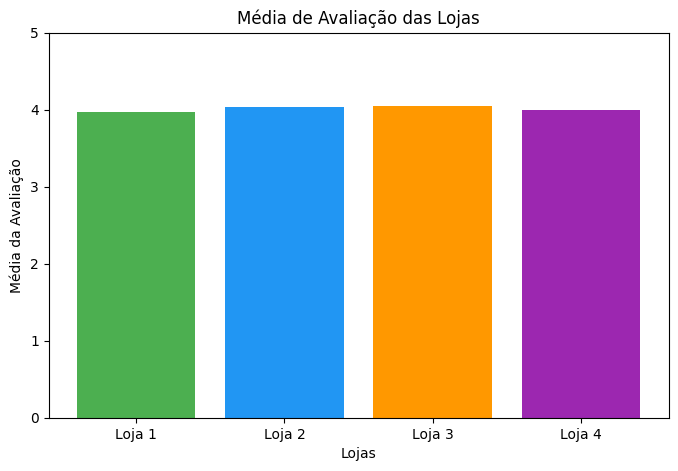

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(medias['Loja'], medias['Média Avaliação'], color=["#4CAF50", "#2196F3", "#FF9800", "#9C27B0"])
plt.title("Média de Avaliação das Lojas")
plt.xlabel("Lojas")
plt.ylabel("Média da Avaliação")
plt.ylim(0, 5)

plt.show()

# 4. Produtos Mais e Menos Vendidos

In [23]:
todas_lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

ranking_produtos = (
    todas_lojas['Produto']
    .value_counts()
    .reset_index()
)

ranking_produtos.columns = ['Produto', 'Quantidade Vendida']
ranking_produtos



,Produto,Quantidade Vendida
0,Cômoda,210
1,Carrinho controle remoto,206
2,Micro-ondas,206
3,Bateria,203
4,Cama king,201
5,Secadora de roupas,200
6,Modelagem preditiva,200
7,Jogo de panelas,200
8,Cama box,199
9,Blocos de montar,199


In [31]:
mais_vendido = loja1['Produto'].value_counts().idxmax()
menos_vendido = loja1['Produto'].value_counts().idxmin()

mais_vendido, menos_vendido


('Micro-ondas', 'Headset')

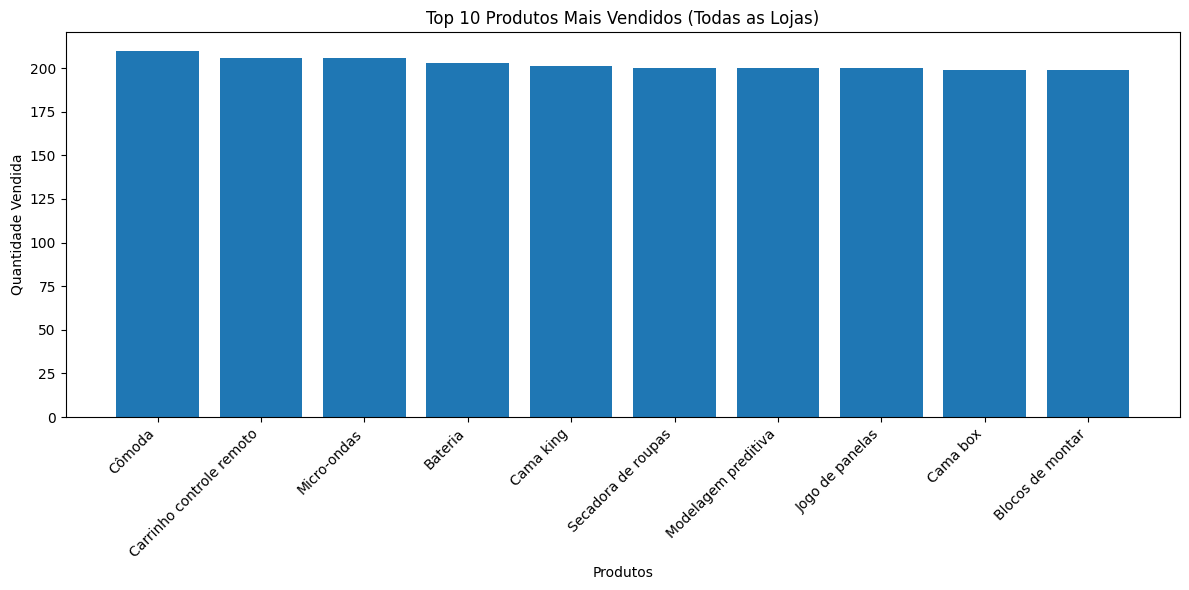

In [36]:
# Combinar todas as lojas em um único DataFrame
todas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Contagem dos produtos mais vendidos
ranking_produtos = todas["Produto"].value_counts()

# Selecionar os top 10 (pode aumentar se quiser)
top10 = ranking_produtos.head(10)

# Plotar
plt.figure(figsize=(12,6))
plt.bar(top10.index, top10.values)
plt.title("Top 10 Produtos Mais Vendidos (Todas as Lojas)")
plt.xlabel("Produtos")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

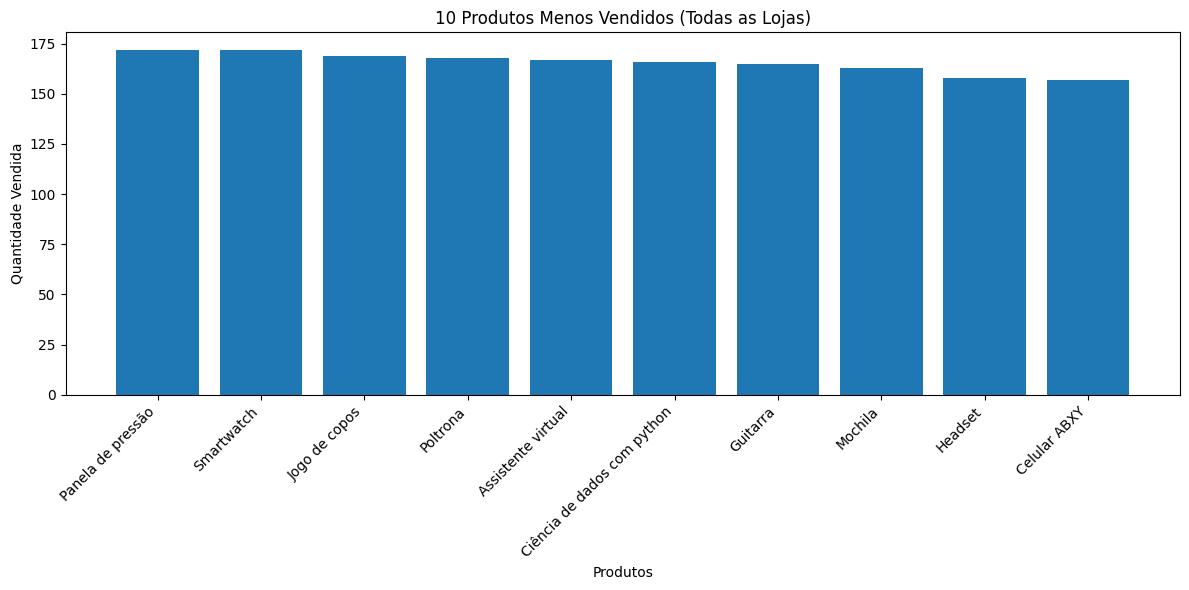

In [37]:
bottom10 = ranking_produtos.tail(10)

plt.figure(figsize=(12,6))
plt.bar(bottom10.index, bottom10.values)
plt.title("10 Produtos Menos Vendidos (Todas as Lojas)")
plt.xlabel("Produtos")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja

In [38]:
fretes = {
    "Loja 1": loja1["Frete"].mean(),
    "Loja 2": loja2["Frete"].mean(),
    "Loja 3": loja3["Frete"].mean(),
    "Loja 4": loja4["Frete"].mean(),
}
fretes


{'Loja 1': np.float64(34.69180491551149),
 'Loja 2': np.float64(33.62194065817927),
 'Loja 3': np.float64(33.07446427411743),
 'Loja 4': np.float64(31.278997081841727)}

In [39]:
df_fretes = pd.DataFrame({
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Frete Médio": [
        loja1["Frete"].mean(),
        loja2["Frete"].mean(),
        loja3["Frete"].mean(),
        loja4["Frete"].mean(),
        ]
})

df_fretes = df_fretes.round(2)
df_fretes

,Loja,Frete Médio
0,Loja 1,34.69
1,Loja 2,33.62
2,Loja 3,33.07
3,Loja 4,31.28


In [41]:
todas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)
frete_medio_total = round(todas["Frete"].mean(), 2)
frete_medio_total



np.float64(33.17)

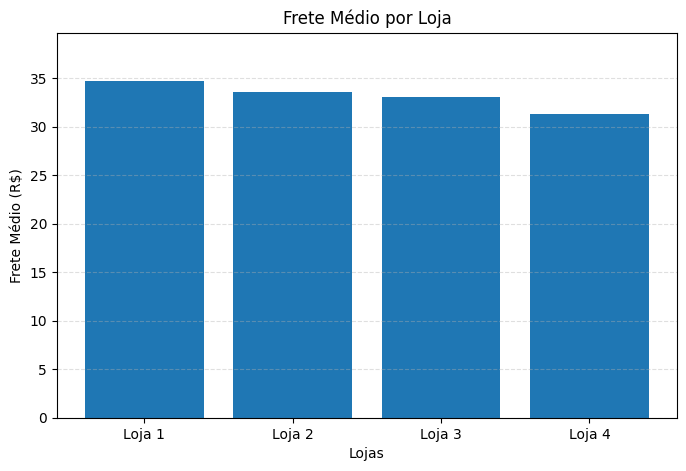

In [42]:
plt.figure(figsize=(8,5))
plt.bar(df_fretes["Loja"], df_fretes["Frete Médio"])
plt.title("Frete Médio por Loja")
plt.xlabel("Lojas")
plt.ylabel("Frete Médio (R$)")
plt.ylim(0, df_fretes["Frete Médio"].max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()